# Cycles Sales Analysis

## Exploratory Data Analysis

In [3]:
# Importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Importing the sales data in the form of DataFrame
df=pd.read_excel('c:\\Users\\fhrt8\\Desktop\\DATA\\Cycles_Sales_Report\\Cycles_Sales\\Notebook\\Data\\Sales_Data.xlsx')

In [6]:
# Getting the initial 5 records from the dataset
df.head()

,Order ID,Date,Sales Agent Last Name,Sales Agent First Name,Customer,Customer Segment,Country,Latitude,Longtitude,Customer Status,Product,Product Type,No Customer Meetings,Units Sold,Order Value
0,2040,2020-05-29,Klassen,Marc,Retina Cyclist,Wholesale,Anguilla,18.220554,-63.068615,Current Customer,R300 Bike,Racing,32,369,14856
1,3281,2020-05-29,Pan,Oliver,Clark Cycles,Wholesale,Liberia,6.428055,-9.429499,Prior Customer,R300 Bike,Racing,14,194,5631
2,3934,2020-05-29,Pinto,Brain,Trail Blazer NE,Wholesale,Palau,7.514980,134.582520,Current Customer,R300 Bike,Racing,29,107,2323
3,2975,2020-05-29,Narula,Tommy,Speed Red,Wholesale,Hong Kong,22.396428,114.109497,Prospect,R300 Bike,Racing,14,106,4793
4,3567,2020-05-29,Petrie,Maddy,Send Cycle,Wholesale,Solomon Islands,-9.645710,160.156194,Current Customer,R200 BIKe 4s,Racing,24,331,13140


In [7]:
# Getting the information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2513 entries, 0 to 2512
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Order ID                2513 non-null   int64         
 1   Date                    2513 non-null   datetime64[ns]
 2   Sales Agent Last Name   2513 non-null   object        
 3   Sales Agent First Name  2513 non-null   object        
 4   Customer                2513 non-null   object        
 5   Customer Segment        2513 non-null   object        
 6   Country                 2513 non-null   object        
 7   Latitude                2513 non-null   float64       
 8   Longtitude              2513 non-null   float64       
 9   Customer Status         2513 non-null   object        
 10  Product                 2513 non-null   object        
 11  Product Type            2513 non-null   object        
 12  No Customer Meetings    2513 non-null   int64   

In [8]:
# Checking if there is any duplicate record
df[df.duplicated()]

,Order ID,Date,Sales Agent Last Name,Sales Agent First Name,Customer,Customer Segment,Country,Latitude,Longtitude,Customer Status,Product,Product Type,No Customer Meetings,Units Sold,Order Value


In [9]:
# Getting the target sales data
df2=pd.read_excel('c:\\Users\\fhrt8\\Desktop\\DATA\\Cycles_Sales_Report\\Cycles_Sales\\Notebook\\Data\\Sales_Data_Target.xlsx')

In [10]:
# Getting firt 5 records from the target dataset
df2.head()

,Date,Product,Product Type,Target Value,Target Units,Target Meeting
0,2020-05-29,R300 Bike,Racing,15940,488,37
1,2020-05-29,R300 Bike,Racing,5929,293,37
2,2020-05-29,R300 Bike,Racing,2932,272,46
3,2020-05-29,R300 Bike,Racing,8066,276,24
4,2020-05-29,R200 BIKe 4s,Racing,15069,439,32


In [11]:
# Getting information about the data
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2514 entries, 0 to 2513
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            2513 non-null   datetime64[ns]
 1   Product         2513 non-null   object        
 2   Product Type    2513 non-null   object        
 3   Target Value    2514 non-null   int64         
 4   Target Units    2514 non-null   int64         
 5   Target Meeting  2514 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 118.0+ KB


In [12]:
# Checking for null values
df2.isnull().sum()

Date              1
Product           1
Product Type      1
Target Value      0
Target Units      0
Target Meeting    0
dtype: int64

In [13]:
# Dropping the null records from the dataset
df2.dropna(axis=0, inplace=True)
df2.head()

,Date,Product,Product Type,Target Value,Target Units,Target Meeting
0,2020-05-29,R300 Bike,Racing,15940,488,37
1,2020-05-29,R300 Bike,Racing,5929,293,37
2,2020-05-29,R300 Bike,Racing,2932,272,46
3,2020-05-29,R300 Bike,Racing,8066,276,24
4,2020-05-29,R200 BIKe 4s,Racing,15069,439,32


In [14]:
# Creating a column named 'Order ID' in Target dataset for data modelling in Power BI
df2['Order ID']=df['Order ID']

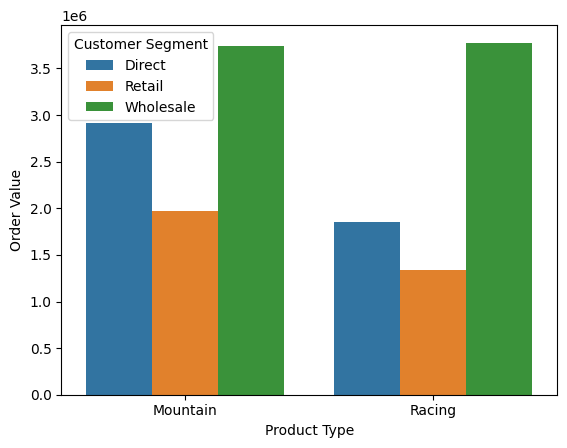

In [15]:
# Plotting bar chart between Order value and Product type with respect to Customer segment
Order_value_by_type=df.groupby(['Product Type','Customer Segment'], as_index=False)['Order Value'].sum()
sns.barplot(data=Order_value_by_type,x='Product Type', y='Order Value', hue='Customer Segment')
plt.show()

### It shows that Mountain type cycles are in more demand in direct and retail whereas wholesale demand is almost equal for both the types of cycles.

<Axes: xlabel='Product Type', ylabel='Units Sold'>

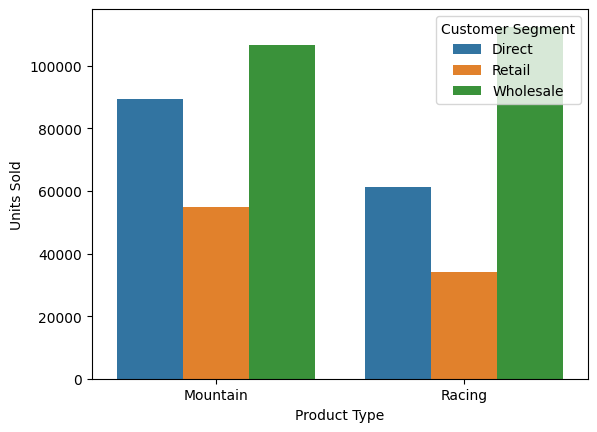

In [16]:
# Plotting bar chart between Units Sold and Product type with respect to Customer segment
units_sold_by_type=df.groupby(['Product Type','Customer Segment'], as_index=False)['Units Sold'].sum()
sns.barplot(data=units_sold_by_type,x='Product Type', y='Units Sold', hue='Customer Segment')

### Similar observation is found in case of units sold

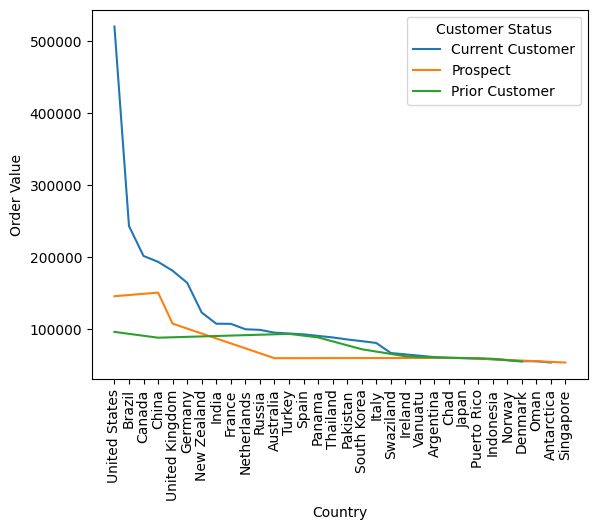

In [17]:
top_countries_in_sales=df.groupby(['Country', 'Customer Status'], as_index=False)['Order Value'].sum().sort_values(by='Order Value', ascending=False).head(40)
sns.lineplot(data=top_countries_in_sales,x='Country', y='Order Value', hue='Customer Status')
plt.xticks(rotation=90)
plt.show()

### It shows that from the top countries in sales, US is on top.

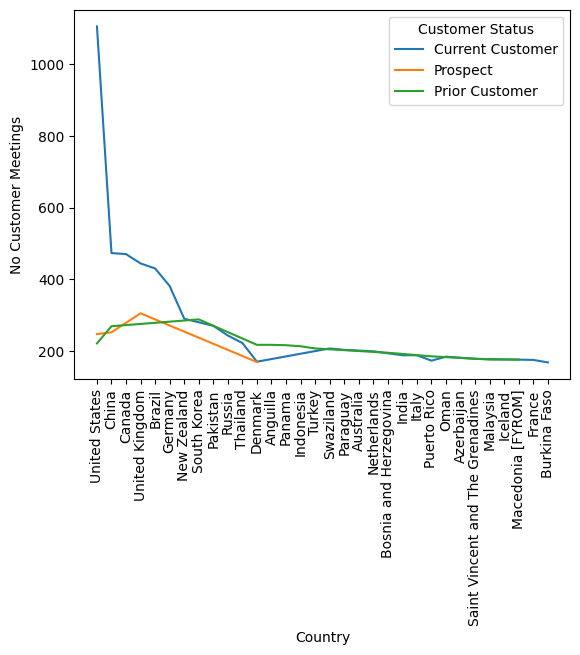

In [18]:
top_countries_in_meetings=df.groupby(['Country', 'Customer Status'], as_index=False)['No Customer Meetings'].sum().sort_values(by='No Customer Meetings', ascending=False).head(40)
sns.lineplot(data=top_countries_in_meetings,x='Country', y='No Customer Meetings', hue='Customer Status')
plt.xticks(rotation=90)
plt.show()

In [19]:
dd=df.groupby(['Country'], as_index=False)['No Customer Meetings'].sum().sort_values(by='No Customer Meetings', ascending=False).head(40)


In [20]:
aa=df.groupby(['Country'], as_index=False)['Order Value'].sum().sort_values(by='Order Value', ascending=False).head(40)


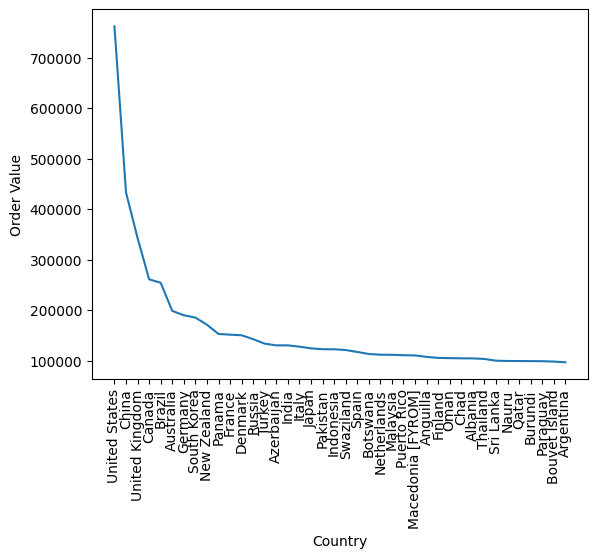

In [21]:
sns.lineplot(data=dd,x=aa['Country'],y=aa['Order Value'])
plt.xticks(rotation=90)
plt.show()

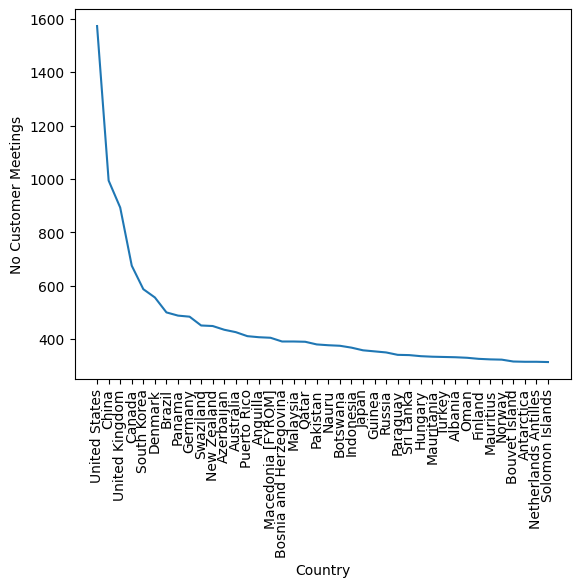

In [22]:
sns.lineplot(data=dd,x=dd['Country'],y=dd['No Customer Meetings'])
plt.xticks(rotation=90)
plt.show()

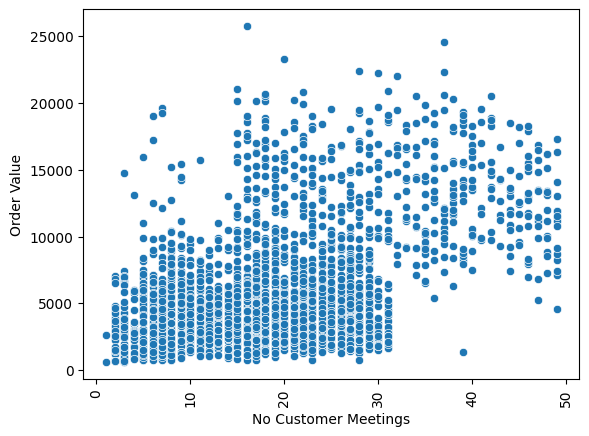

In [23]:
sns.scatterplot(data=df,x='No Customer Meetings', y='Order Value')
plt.xticks(rotation=90)
plt.show()

In [29]:
# df.boxplot(by='Customer Segment', column=['No Customer Meetings'], grid=False)

In [28]:
# df.boxplot(by='Customer Segment', column=['Order Value'], grid=False)